# <CENTER>PS EQUAL 2022

In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# visualizando dataframes

vendas_df = pd.read_csv('fato_vendas.csv', sep=';', low_memory=False)
produtos_df = pd.read_csv('dim_produtos.csv', sep=';')
grupo_df = pd.read_csv('dim_grupos.csv', sep=';')
vendedor_df = pd.read_csv('dim_vendedor.csv', sep=';')
print('\033[1;33m tabela de vendas')
display(vendas_df.head())
print('\033[1;33m tabela de produtos')
display(produtos_df.head())
print('\033[1;33m tabela de grupos')
display(grupo_df.head())
print('\033[1;33m tabela de vendedores')
display(vendedor_df.head())

 tabela de vendas


,data_venda,contrato,filial,codigo_produto,quantidade,total_liquido,codigo_vendedor,codigo_cliente
0,01/07/2019 00:00,1536636,16,146600,7,"16,28",286,44741.0
1,01/07/2019 00:00,1536115,3,1273800,3,"15,71",389,65518.0
2,01/07/2019 00:00,1536481,17,1125900,7,"501,28",243,244505.0
3,01/07/2019 00:00,1536439,3,521200,10,"139,32",218,360939.0
4,01/07/2019 00:00,1536636,16,706100,8,"470,19",286,44741.0


 tabela de produtos


,codigo_produto,descricaoproduto,codigo_marca,codigo_grupo
0,79000,SKU 79000,1,160
1,360500,SKU 360500,290,FR
2,546400,SKU 546400,56,DSG
3,548000,SKU 548000,1,500
4,1096700,SKU 1096700,120,OPFP


 tabela de grupos


,codigo_grupo,descricaogrupo
0,53,calcados pantufa
1,EDC,estetoscopio duplo cardiologico
2,TEST,autoteste
3,MLA,mascaras lavaveis
4,TFD,teste fertilidade


 tabela de vendedores


,codigo_vendedor,nome_vendedor
0,111,Maria 111
1,323,Maria 323
2,250,Maria 250
3,488,Jose 488
4,448,Maria 448


In [3]:
#tipos de dados das colunas

vendas_df.dtypes

data_venda          object
contrato            object
filial               int64
codigo_produto       int64
quantidade           int64
total_liquido       object
codigo_vendedor      int64
codigo_cliente     float64
dtype: object

In [4]:
#transformando a coluna 'total_liquido' em número

vendas_df['total_liquido'] = vendas_df['total_liquido'].str.replace(',', '.')   #substituindo a vírgula por ponto
vendas_df['total_liquido'] = vendas_df['total_liquido'].astype(float)           #transformando str em float

# transformando o nome das filiais em string para facilitar

vendas_df['filial'] = vendas_df['filial'].astype(str)
filiais = ['16', '3', '17', '8', '10', '1', '14', '11']
filiais_renomeadas = ['filial 16', 'filial 3', 'filial 17', 'filial 8', 'filial 10', 'filial 1', 'filial 14', 'filial 11']
dic_filial = dict(zip(filiais, filiais_renomeadas))
vendas_df = vendas_df.replace({'filial': dic_filial}) 

In [5]:
vendas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239622 entries, 0 to 239621
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   data_venda       239622 non-null  object 
 1   contrato         239622 non-null  object 
 2   filial           239622 non-null  object 
 3   codigo_produto   239622 non-null  int64  
 4   quantidade       239622 non-null  int64  
 5   total_liquido    239622 non-null  float64
 6   codigo_vendedor  239622 non-null  int64  
 7   codigo_cliente   239616 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 14.6+ MB


In [6]:
# juntando todas as informações das outras tabelas na tabela de vendas 

produtos_df = pd.merge(produtos_df, grupo_df, on = 'codigo_grupo')
vendas_df = pd.merge(vendas_df, vendedor_df, on = 'codigo_vendedor')
vendas_df = pd.merge(vendas_df, produtos_df, on = 'codigo_produto')

In [7]:
vendas_df

,data_venda,contrato,filial,codigo_produto,quantidade,total_liquido,codigo_vendedor,codigo_cliente,nome_vendedor,descricaoproduto,codigo_marca,codigo_grupo,descricaogrupo
0,01/07/2019 00:00,1536636,filial 16,146600,7,16.28,286,44741.0,Maria 286,SKU 146600,25,PL,pilhas
1,04/07/2019 00:00,1540095,filial 16,146600,3,6.44,286,341801.0,Maria 286,SKU 146600,25,PL,pilhas
2,05/07/2019 00:00,1540569,filial 16,146600,2,9.96,286,257357.0,Maria 286,SKU 146600,25,PL,pilhas
3,05/07/2019 00:00,1540415,filial 16,146600,6,12.70,286,341801.0,Maria 286,SKU 146600,25,PL,pilhas
4,09/07/2019 00:00,1543847,filial 16,146600,7,13.74,286,341801.0,Maria 286,SKU 146600,25,PL,pilhas
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239617,20/12/2019 00:00,1701938,filial 16,2603200,2,69.78,459,249519.0,Jose 459,SKU 2603200,49,100,"fisio/fit fitness, bod"
239618,21/12/2019 00:00,1702611,filial 16,2087600,3,293.48,459,436903.0,Jose 459,SKU 2087600,186,CSF,calcados skechers feminino
239619,23/12/2019 00:00,1703703,filial 16,2077900,4,102.79,459,437268.0,Jose 459,SKU 2077900,186,CSF,calcados skechers feminino
239620,20/12/2019 00:00,1701802,filial 8,2338201,3,380.61,468,248289.0,Maria 468,SKU 2338201,667,SFU,calcados sandalia feminino usaflex


In [8]:
vendas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239622 entries, 0 to 239621
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   data_venda        239622 non-null  object 
 1   contrato          239622 non-null  object 
 2   filial            239622 non-null  object 
 3   codigo_produto    239622 non-null  int64  
 4   quantidade        239622 non-null  int64  
 5   total_liquido     239622 non-null  float64
 6   codigo_vendedor   239622 non-null  int64  
 7   codigo_cliente    239616 non-null  float64
 8   nome_vendedor     239622 non-null  object 
 9   descricaoproduto  239622 non-null  object 
 10  codigo_marca      239622 non-null  int64  
 11  codigo_grupo      239622 non-null  object 
 12  descricaogrupo    239622 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 25.6+ MB


# Questão 1

* **Quantos produtos distintos foram comercializados no segundo semestre de 2019?**

In [9]:
#quantidade de produtos distintos, contando os valores únicos dos produtos comercializados

produtos_distintos = vendas_df['codigo_produto']
print(len(produtos_distintos))
print(len(produtos_distintos.unique()))

239622
7323


In [10]:
vendas_df['codigo_produto'].nunique()

7323

In [11]:
vendas_df['descricaoproduto'].nunique()

7323

# Questão 2

* **Quais são os 10 grupos, ou famílias de produtos que mais impactam no faturamento e quanto eles representam percentualmente do faturamento total?**

In [12]:
#agrupando o faturamento por produtos e mostrando os 10 produtos que mais faturaram

fat_grupos = vendas_df.groupby('descricaogrupo').sum()
fat_grupos = fat_grupos[['total_liquido']].sort_values('total_liquido',ascending=False)  # colocando em ordem crescente
top10grupos = fat_grupos[:10]     # separando somente os top10
pd.set_option('float_format','{:.2f}'.format)  # formatando para duas casas decimais
top10grupos

,total_liquido
descricaogrupo,
aa sinal de pedido,2913173.65
calcados skechers feminino,2639690.74
meia compressao medicinal 2030,1847930.42
calcados skechers masculino,1786643.77
massageadores shiatsu,1545391.96
x04 cadeira rodas,1116069.80
x05 cadeira motorizada e scoot,736180.35
aparelho de pressao digital elite,711384.93
higiene bucal irrigador oral,705564.33


In [13]:
# calculando o faturamento total

faturamento_total = fat_grupos['total_liquido'].sum()
print('{:.2f}'.format(faturamento_total))

45490891.88


In [14]:
top10grupos = top10grupos.reset_index()

In [15]:
#calculando a porcentagem do faturamento de cada produto em relação ao faturamento total

top10grupos['porcentagem_valortotal'] = (top10grupos['total_liquido'] / faturamento_total) * 100

In [16]:
display(top10grupos)

,descricaogrupo,total_liquido,porcentagem_valortotal
0,aa sinal de pedido,2913173.65,6.40
1,calcados skechers feminino,2639690.74,5.80
2,meia compressao medicinal 2030,1847930.42,4.06
3,calcados skechers masculino,1786643.77,3.93
4,massageadores shiatsu,1545391.96,3.40
5,x04 cadeira rodas,1116069.80,2.45
6,x05 cadeira motorizada e scoot,736180.35,1.62
7,aparelho de pressao digital elite,711384.93,1.56
8,higiene bucal irrigador oral,705564.33,1.55
9,estetoscopios duplo,598657.74,1.32


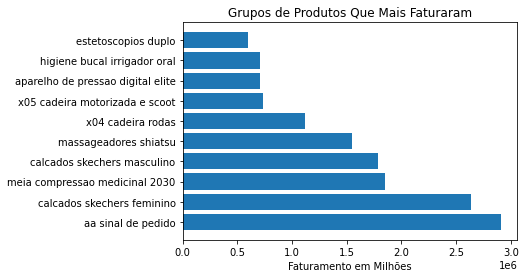

In [17]:
# colocando em um gráfico os produtos que mais faturaram

plt.barh(top10grupos['descricaogrupo'], top10grupos['total_liquido'])
plt.xlabel('Faturamento em Milhões')
plt.title('Grupos de Produtos Que Mais Faturaram')
plt.show()

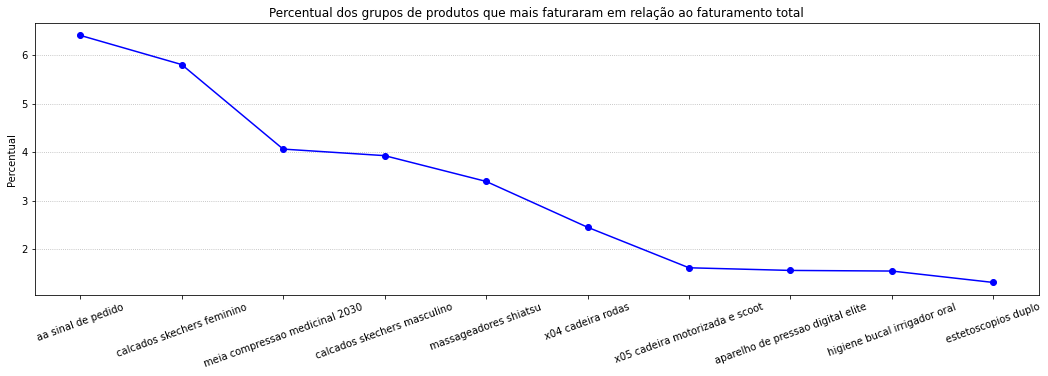

In [25]:
# colocando em um gráfico o percentual dos produtos em relação ao faturamento total

plt.figure(figsize=(18,5))
plt.plot(top10grupos['descricaogrupo'], top10grupos['porcentagem_valortotal'], 'b-o')
plt.xticks(rotation=20)
plt.title('Percentual dos grupos de produtos que mais faturaram em relação ao faturamento total')
plt.ylabel('Percentual')
plt.grid(axis='y', linestyle=':')

plt.show()

# Questão 3

* **Como foram as vendas por loja nos últimos 6 meses do ano de 2019?**

In [26]:
# faturamento total e quantidade vendida de cada loja

vendas_lojas = vendas_df.groupby('filial').sum()
vendas_lojas = vendas_lojas[['total_liquido', 'quantidade']]
vendas_lojas = vendas_lojas.reset_index()
display(vendas_lojas)

,filial,total_liquido,quantidade
0,filial 1,6565511.41,145358
1,filial 10,6540026.24,157352
2,filial 11,4034364.12,98813
3,filial 14,6778881.15,164779
4,filial 16,5524950.35,184194
5,filial 17,5853633.45,135861
6,filial 3,5416385.66,143771
7,filial 8,4777139.50,126648


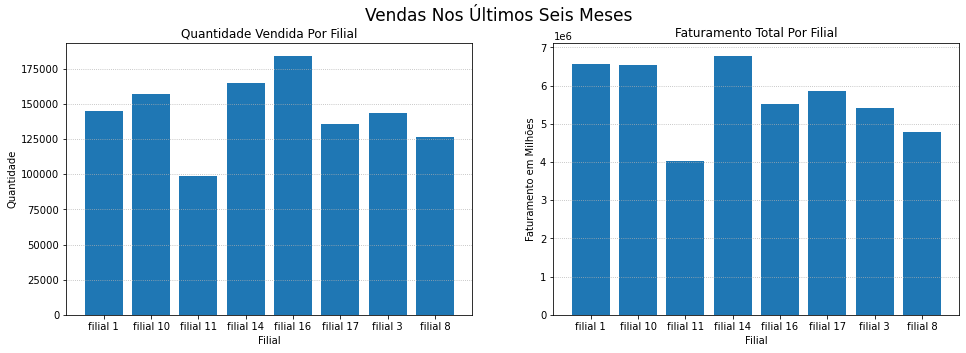

In [27]:
# colocando em um gráfico o faturamento e a quantidade de cada loja

plt.figure(figsize=(16,5))

plt.subplot(121)
plt.bar(vendas_lojas['filial'], vendas_lojas['quantidade'])
plt.grid(axis='y',linestyle=':')
plt.title('Quantidade Vendida Por Filial')
plt.xlabel('Filial')
plt.ylabel('Quantidade')

plt.subplot(122)
plt.bar(vendas_lojas['filial'], vendas_lojas['total_liquido'])
plt.grid(axis='y',linestyle=':')
plt.title('Faturamento Total Por Filial')
plt.xlabel('Filial')
plt.ylabel('Faturamento em Milhões')
plt.yticks(np.arange(0,8000000,1000000))

plt.suptitle('Vendas Nos Últimos Seis Meses', fontsize= 17)
plt.show()

# Questão 4

* **Qual vendedor apresentou o maior crescimento de ticket médio no último mês? (Considerar apenas vendedores que fecharam contratos em Nov/19 e Dez/19). Ticket Médio: faturamento/volume de vendas**

In [28]:
vendas_df.head()

,data_venda,contrato,filial,codigo_produto,quantidade,total_liquido,codigo_vendedor,codigo_cliente,nome_vendedor,descricaoproduto,codigo_marca,codigo_grupo,descricaogrupo
0,01/07/2019 00:00,1536636,filial 16,146600,7,16.28,286,44741.00,Maria 286,SKU 146600,25,PL,pilhas
1,04/07/2019 00:00,1540095,filial 16,146600,3,6.44,286,341801.00,Maria 286,SKU 146600,25,PL,pilhas
2,05/07/2019 00:00,1540569,filial 16,146600,2,9.96,286,257357.00,Maria 286,SKU 146600,25,PL,pilhas
3,05/07/2019 00:00,1540415,filial 16,146600,6,12.70,286,341801.00,Maria 286,SKU 146600,25,PL,pilhas
4,09/07/2019 00:00,1543847,filial 16,146600,7,13.74,286,341801.00,Maria 286,SKU 146600,25,PL,pilhas


In [29]:
# separando somente as vendas feitas em novembro e dezembro

vendas_11_2019 = vendas_df[vendas_df['data_venda'].str.contains('11/2019')][['quantidade','nome_vendedor','total_liquido','data_venda']]
vendas_12_2019 = vendas_df[vendas_df['data_venda'].str.contains('12/2019')][['quantidade','nome_vendedor','total_liquido','data_venda']]

In [30]:
# organizando as tabelas de vendas de novembro e dezembro

vendas_11_2019 = vendas_11_2019.reset_index(drop=True)
vendas_12_2019 = vendas_12_2019.reset_index(drop=True)
vendas_11_2019.rename(columns= {'quantidade' : 'quantidade_nov'}, inplace=True)
vendas_12_2019.rename(columns= {'quantidade' : 'quantidade_dez'}, inplace=True)
vendas_11_2019.rename(columns= {'total_liquido' : 'total_liquido_nov'}, inplace=True)
vendas_12_2019.rename(columns= {'total_liquido' : 'total_liquido_dez'}, inplace=True)

display(vendas_11_2019)
display(vendas_12_2019)

,quantidade_nov,nome_vendedor,total_liquido_nov,data_venda
0,4,Maria 286,12.61,01/11/2019 00:00
1,5,Maria 369,18.12,05/11/2019 00:00
2,4,Jose 314,0.08,13/11/2019 00:00
3,6,Jose 314,29.38,21/11/2019 00:00
4,6,Jose 314,30.68,29/11/2019 00:00
...,...,...,...,...
38113,2,Maria 300,36.02,19/11/2019 00:00
38114,4,Maria 300,443.26,20/11/2019 00:00
38115,9,Maria 300,134.42,19/11/2019 00:00
38116,1,Maria 300,20.74,28/11/2019 00:00


,quantidade_dez,nome_vendedor,total_liquido_dez,data_venda
0,6,Maria 286,30.88,03/12/2019 00:00
1,6,Maria 286,26.10,10/12/2019 00:00
2,2,Jose 389,5.94,02/12/2019 00:00
3,9,Jose 389,38.90,11/12/2019 00:00
4,5,Jose 412,23.02,09/12/2019 00:00
...,...,...,...,...
37494,2,Jose 459,69.78,20/12/2019 00:00
37495,3,Jose 459,293.48,21/12/2019 00:00
37496,4,Jose 459,102.79,23/12/2019 00:00
37497,3,Maria 468,380.61,20/12/2019 00:00


In [31]:
# verificando se há os mesmos vendedores nas tabelas de novembro e dezembro, 0 = não esta presente nas duas, 1 = está nas duas.
# separando somente os vendedores que estão nas duas

vendas_11_2019 = vendas_11_2019.assign(Existe_DF2=vendas_11_2019.nome_vendedor.isin(vendas_12_2019.nome_vendedor).astype(int))
vendas_11_2019 = vendas_11_2019[vendas_11_2019['Existe_DF2'] == 1]
vendas_11_2019 = vendas_11_2019.reset_index(drop=True)

vendas_12_2019 = vendas_12_2019.assign(Existe_DF1=vendas_12_2019.nome_vendedor.isin(vendas_11_2019.nome_vendedor).astype(int))
vendas_12_2019 = vendas_12_2019[vendas_12_2019['Existe_DF1'] == 1]
vendas_12_2019 = vendas_12_2019.reset_index(drop=True)

In [32]:
vendas_11_2019


,quantidade_nov,nome_vendedor,total_liquido_nov,data_venda,Existe_DF2
0,4,Maria 286,12.61,01/11/2019 00:00,1
1,5,Maria 369,18.12,05/11/2019 00:00,1
2,4,Jose 314,0.08,13/11/2019 00:00,1
3,6,Jose 314,29.38,21/11/2019 00:00,1
4,6,Jose 314,30.68,29/11/2019 00:00,1
...,...,...,...,...,...
37863,2,Maria 300,36.02,19/11/2019 00:00,1
37864,4,Maria 300,443.26,20/11/2019 00:00,1
37865,9,Maria 300,134.42,19/11/2019 00:00,1
37866,1,Maria 300,20.74,28/11/2019 00:00,1


In [33]:
vendas_12_2019

,quantidade_dez,nome_vendedor,total_liquido_dez,data_venda,Existe_DF1
0,6,Maria 286,30.88,03/12/2019 00:00,1
1,6,Maria 286,26.10,10/12/2019 00:00,1
2,2,Jose 389,5.94,02/12/2019 00:00,1
3,9,Jose 389,38.90,11/12/2019 00:00,1
4,5,Jose 412,23.02,09/12/2019 00:00,1
...,...,...,...,...,...
36641,7,Maria 455,314.94,13/12/2019 00:00,1
36642,7,Jose 459,438.87,17/12/2019 00:00,1
36643,2,Jose 459,69.78,20/12/2019 00:00,1
36644,3,Jose 459,293.48,21/12/2019 00:00,1


In [34]:
# calculando o ticket medio dos vendedores das vendas de novembro

ticketmedio_vendedor_nov = vendas_11_2019.groupby('nome_vendedor').sum()  #agrupando por vendedor
ticketmedio_vendedor_nov = ticketmedio_vendedor_nov.reset_index()
ticketmedio_vendedor_nov['ticket_medio_nov'] = ticketmedio_vendedor_nov['total_liquido_nov'] / ticketmedio_vendedor_nov['quantidade_nov']
ticketmedio_vendedor_nov.drop('Existe_DF2', axis=1, inplace = True)  #excluindo a coluna pois não será mais necessária

display(ticketmedio_vendedor_nov)


,nome_vendedor,quantidade_nov,total_liquido_nov,ticket_medio_nov
0,Jose 107,9,380.72,42.30
1,Jose 109,741,16175.76,21.83
2,Jose 113,4204,155118.01,36.90
3,Jose 130,886,32780.99,37.00
4,Jose 140,2428,110418.90,45.48
...,...,...,...,...
67,Maria 443,3772,122316.65,32.43
68,Maria 445,3367,118983.68,35.34
69,Maria 446,6,192.35,32.06
70,Maria 448,2420,156510.21,64.67


In [35]:
# calculando o ticket medio dos vendedores das vendas de dezembro

ticketmedio_vendedor_dez = vendas_12_2019.groupby('nome_vendedor').sum()  #agrupando por vendedor
ticketmedio_vendedor_dez = ticketmedio_vendedor_dez.reset_index()
ticketmedio_vendedor_dez['ticket_medio_dez'] = ticketmedio_vendedor_dez['total_liquido_dez'] / ticketmedio_vendedor_dez['quantidade_dez']
ticketmedio_vendedor_dez.drop('Existe_DF1', axis=1, inplace=True)  #excluindo a coluna pois não será mais necessária

display(ticketmedio_vendedor_dez)

,nome_vendedor,quantidade_dez,total_liquido_dez,ticket_medio_dez
0,Jose 107,20,87.80,4.39
1,Jose 109,758,27767.30,36.63
2,Jose 113,3809,159265.57,41.81
3,Jose 130,1075,27503.82,25.58
4,Jose 140,2251,84414.20,37.50
...,...,...,...,...
67,Maria 443,3275,124872.65,38.13
68,Maria 445,3248,144238.56,44.41
69,Maria 446,7,747.21,106.74
70,Maria 448,3269,110199.80,33.71


In [36]:
# juntando as duas tabelas de vendas de novembro e dezembro

vendas_nov_dez = pd.concat([ticketmedio_vendedor_nov, ticketmedio_vendedor_dez], join='outer')

# vendedores que tem vendas em novembro e dezembro

vendas_nov_dez = vendas_nov_dez[vendas_nov_dez['nome_vendedor'].duplicated(keep=False)]
vendas_nov_dez = vendas_nov_dez.reset_index(drop=True)

# calculando o crescimento do ticket medio de novembro pra dezembro

vendas_nov_dez['cresc_ticketmedio'] = ticketmedio_vendedor_dez['ticket_medio_dez'] - ticketmedio_vendedor_nov['ticket_medio_nov']

#organizando a tabela

vendas_nov_dez = vendas_nov_dez[vendas_nov_dez['nome_vendedor'].duplicated(keep='last')]
vendas_nov_dez['ticket_medio_dez'] = ticketmedio_vendedor_dez['ticket_medio_dez']
vendas_nov_dez['quantidade_dez'] = ticketmedio_vendedor_dez['quantidade_dez']
vendas_nov_dez['total_liquido_dez'] = ticketmedio_vendedor_dez['total_liquido_dez']

vendas_nov_dez

,nome_vendedor,quantidade_nov,total_liquido_nov,ticket_medio_nov,quantidade_dez,total_liquido_dez,ticket_medio_dez,cresc_ticketmedio
0,Jose 107,9.00,380.72,42.30,20,87.80,4.39,-37.91
1,Jose 109,741.00,16175.76,21.83,758,27767.30,36.63,14.80
2,Jose 113,4204.00,155118.01,36.90,3809,159265.57,41.81,4.92
3,Jose 130,886.00,32780.99,37.00,1075,27503.82,25.58,-11.41
4,Jose 140,2428.00,110418.90,45.48,2251,84414.20,37.50,-7.98
...,...,...,...,...,...,...,...,...
67,Maria 443,3772.00,122316.65,32.43,3275,124872.65,38.13,5.70
68,Maria 445,3367.00,118983.68,35.34,3248,144238.56,44.41,9.07
69,Maria 446,6.00,192.35,32.06,7,747.21,106.74,74.69
70,Maria 448,2420.00,156510.21,64.67,3269,110199.80,33.71,-30.96


In [37]:
# verificando quem obteve o maior crescimento de ticket medio

vendas_nov_dez[vendas_nov_dez['cresc_ticketmedio'].max() == vendas_nov_dez['cresc_ticketmedio']]['nome_vendedor']

69    Maria 446
Name: nome_vendedor, dtype: object

In [38]:
# conferindo

display(vendas_nov_dez[vendas_nov_dez['nome_vendedor'] == 'Maria 446'])
vendas_nov_dez['cresc_ticketmedio'].describe()

,nome_vendedor,quantidade_nov,total_liquido_nov,ticket_medio_nov,quantidade_dez,total_liquido_dez,ticket_medio_dez,cresc_ticketmedio
69,Maria 446,6.00,192.35,32.06,7,747.21,106.74,74.69


count    72.00
mean      1.25
std      16.35
min     -37.91
25%      -4.23
50%       2.30
75%       8.82
max      74.69
Name: cresc_ticketmedio, dtype: float64

# Questão 5

* **5. Supondo que os dados estivessem em uma base de dados estruturada, escreva uma consulta em SQL que traga as vendas agrupadas por grupo de produtos da filial 1 no último mês do ano de 2019.**

In [39]:
'''
        select
            *,
            count(*) as 'quantidade de vendas'
        from fato_vendas
        where data_venda >= '2019-12-01' and filial = 1
        group by codigo_grupo;
        
'''

"\n        select\n            *,\n            count(*) as 'quantidade de vendas'\n        from fato_vendas\n        where data_venda >= '2019-12-01' and filial = 1\n        group by codigo_grupo;\n        \n"

##### criei uma mini tabela com os dados e importei no mysql e testei o código